# Efficiency LIANA+

In [3]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix

import scanpy as sc
import liana as li

from itertools import product

import psutil
from timeit import default_timer as timer

import gc

In [4]:
from benchmark import _benchmark, _sample_anndata, _sample_resource

## Single-cell

In [5]:
# Define Methods
def cpdb_no_perms(**kwargs):
    li.mt.cellphonedb(**kwargs, n_perms=None)
def cellchat_no_perms(**kwargs):
    li.mt.cellchat(**kwargs, n_perms=None)
def magnitude_only(**kwargs):
    li.mt.rank_aggregate(**kwargs, n_perms=None)
def rank_aggregate(**kwargs):
    li.mt.rank_aggregate(**kwargs, n_perms=100)

methods = {
    # "CellPhoneDB": li.mt.cellphonedb,
    # "CellChat": li.mt.cellchat,
    "CellPhoneDB_NP": cpdb_no_perms,
    "CellChat_NP": cellchat_no_perms,
    "Rank Aggregate": rank_aggregate,
    # "Magnitude Aggregate": magnitude_only,
    # "NATMI": li.mt.natmi,
    # "Connectome": li.mt.connectome,
    # "log2FC": li.mt.logfc,
    }

In [14]:
benchmark_stats = pd.DataFrame(columns=["method", "dataset", "time", "memory"])

obs_range = [1000, 10000, 25000, 50000, 100000, 500000]

for n_obs in obs_range:
    print(n_obs)
    adata = _sample_anndata(n_obs=n_obs)
    resource = _sample_resource(adata, n_lrs=3000)
        
    for method in methods.keys():
        for _ in range(5):
            print(method)
            time, memory = _benchmark(function=methods[method],
                                      adata=adata,
                                      resource=resource,
                                      groupby='cell_type',
                                      use_raw=False,
                                      verbose=False,
                                      n_jobs=12
                                      )
            benchmark_stats.loc[len(benchmark_stats)] = [method, n_obs, time, memory]
    benchmark_stats.to_csv("sc_stats.csv", index=False)
    
    gc.collect()

1000
 NNZ fraction: 0.0998465
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellChat_NP
CellChat_NP
CellChat_NP
CellChat_NP
CellChat_NP
Rank Aggregate
Rank Aggregate
Rank Aggregate
Rank Aggregate
Rank Aggregate
10000
 NNZ fraction: 0.0999469
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellChat_NP
CellChat_NP
CellChat_NP
CellChat_NP
CellChat_NP
Rank Aggregate
Rank Aggregate
Rank Aggregate
Rank Aggregate
Rank Aggregate
25000
 NNZ fraction: 0.10006314
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellChat_NP
CellChat_NP
CellChat_NP
CellChat_NP
CellChat_NP
Rank Aggregate
Rank Aggregate
Rank Aggregate
Rank Aggregate
Rank Aggregate
50000
 NNZ fraction: 0.10000397
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellPhoneDB_NP
CellChat_NP
CellChat_NP
CellChat_NP
CellChat_NP
CellChat_NP
Rank Aggregate
Rank Aggregate
Rank Aggregate
Rank Aggregate
Rank Aggregate
100000
 NNZ fraction: 0.099998885
C

In [5]:
import plotnine as p9

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


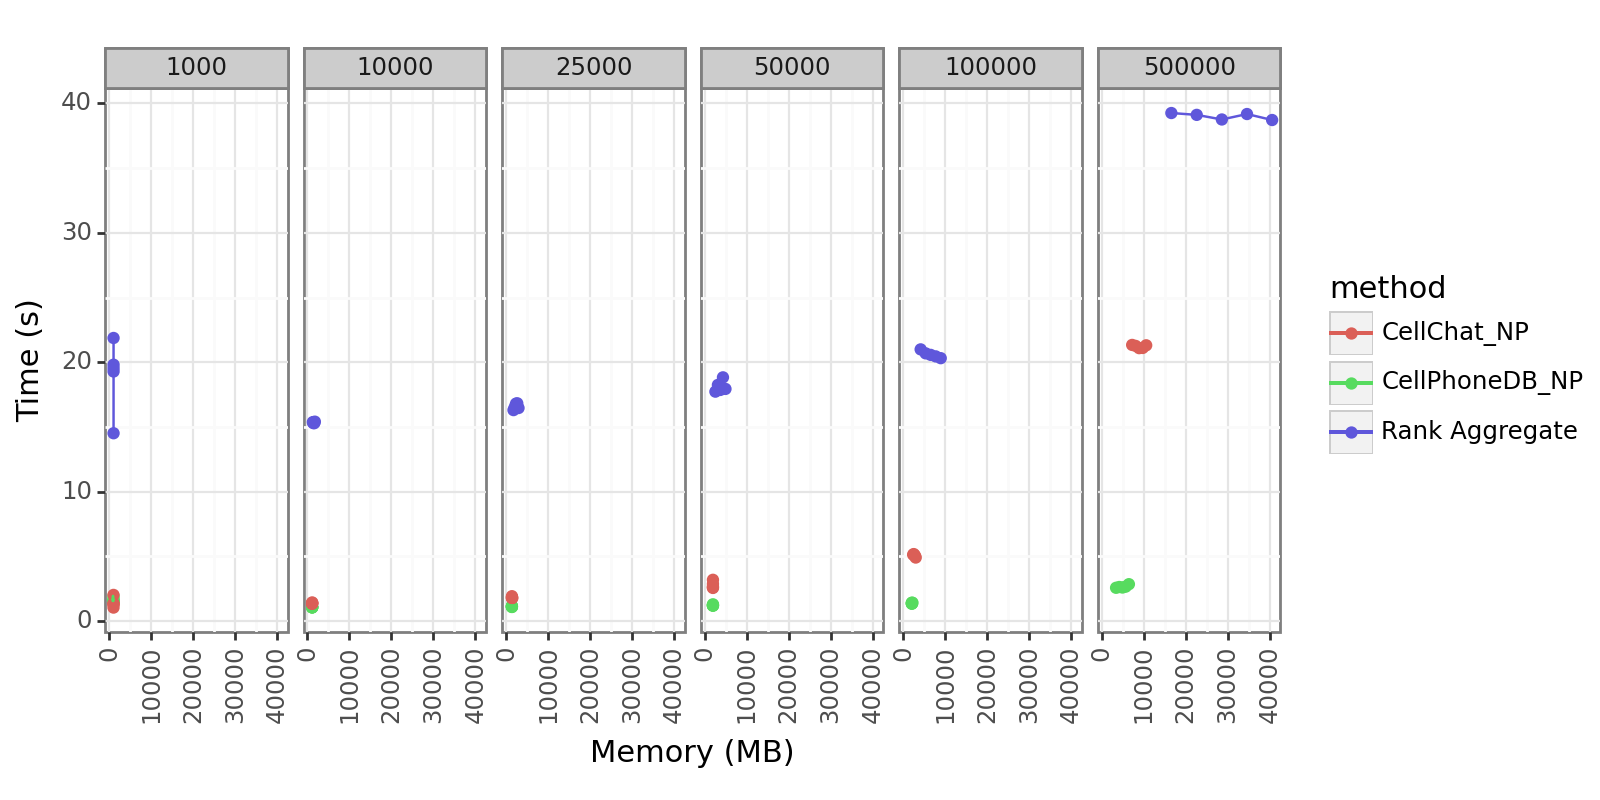

<Figure Size: (800 x 400)>

In [16]:
(
    p9.ggplot(benchmark_stats, p9.aes(x="memory", y="time", color="method")) + 
    p9.geom_point() +
    p9.geom_line() +
    p9.theme_bw() +
    p9.facet_grid("~ dataset" ) +
    p9.labs(x="Memory (MB)", y="Time (s)") +
    # rotate
    p9.theme(axis_text_x = p9.element_text(angle = 90), figure_size=(8, 4))
)

## Local Spatial Scores

In [6]:
import squidpy as sq
import scanpy as sc
import pandas as pd
from itertools import product

In [38]:
n_lrs = 500

In [7]:
# NOTE: I'm not benchmarking masked_pearson here cuz it's much less efficient than any other score
methods = ["cosine", "jaccard", "spearman", "pearson", "morans"] # , "masked_spearman"

In [8]:
obs_list = ["xenium", 1000, 5000, 10000, 25000, 50000, 100000]

In [20]:
benchmark_stats = pd.DataFrame(columns=["method", "dataset", "time", "memory"])

for n_obs in obs_list:
    print(n_obs)
    
    if isinstance(n_obs, int):
        adata = _sample_anndata(n_obs=n_obs)
        resource = _sample_resource(adata, n_lrs=n_lrs)
    elif (n_obs=="xenium"):
        adata = sc.read_h5ad("xenium.h5ad")
        resource = adata.uns['resource']
        
    for method in methods:
        print(method)
        
        for _ in range(5):
            time, memory = _benchmark(function=li.mt.lr_bivar, 
                                      adata=adata, 
                                      function_name=method, 
                                      n_perms=None,
                                      use_raw=False, 
                                      verbose=False,
                                      mask_negatives=False,
                                      resource=resource
                                      )
            benchmark_stats.loc[len(benchmark_stats)] = [method, n_obs, time, memory]
    benchmark_stats.to_csv("sp_stats.csv", index=False)

xenium
cosine


jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

1000
 NNZ fraction: 0.0998465
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans
5000
 NNZ fraction: 0.0999908
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans
10000
 NNZ fraction: 0.0999469
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans
25000
 NNZ fraction: 0.10006314
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans
50000
 NNZ fraction: 0.10000397
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans
100000
 NNZ fraction: 0.099998885
cosine
jaccard
spearman


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

pearson


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

morans


/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/liana/method/sp/_SpatialBivariate.py:274: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid 

### Plot Results

In [21]:
import plotnine as p9

In [35]:
benchmark_stats = pd.read_csv("sp_stats.csv")


In [36]:
# ints to name & as category
dataset_dict = {
    '1000': "1k",
    '5000': "5k",
    '10000': "10k",
    '25000': "25k",
    '50000': "50k",
    '100000': "100k",
    "xenium": "Xenium (164k)"
}
benchmark_stats['dataset'] = benchmark_stats['dataset'].astype('category')
benchmark_stats['dataset'] = benchmark_stats['dataset'].astype(str).replace(dataset_dict).astype('category')
benchmark_stats['method'] = benchmark_stats['method'].astype('category')
# reoder to values in dataset_dict
benchmark_stats['dataset'] = pd.Categorical(benchmark_stats['dataset'], categories=dataset_dict.values(), ordered=True)

benchmark_stats['time'] = benchmark_stats['time'] 

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


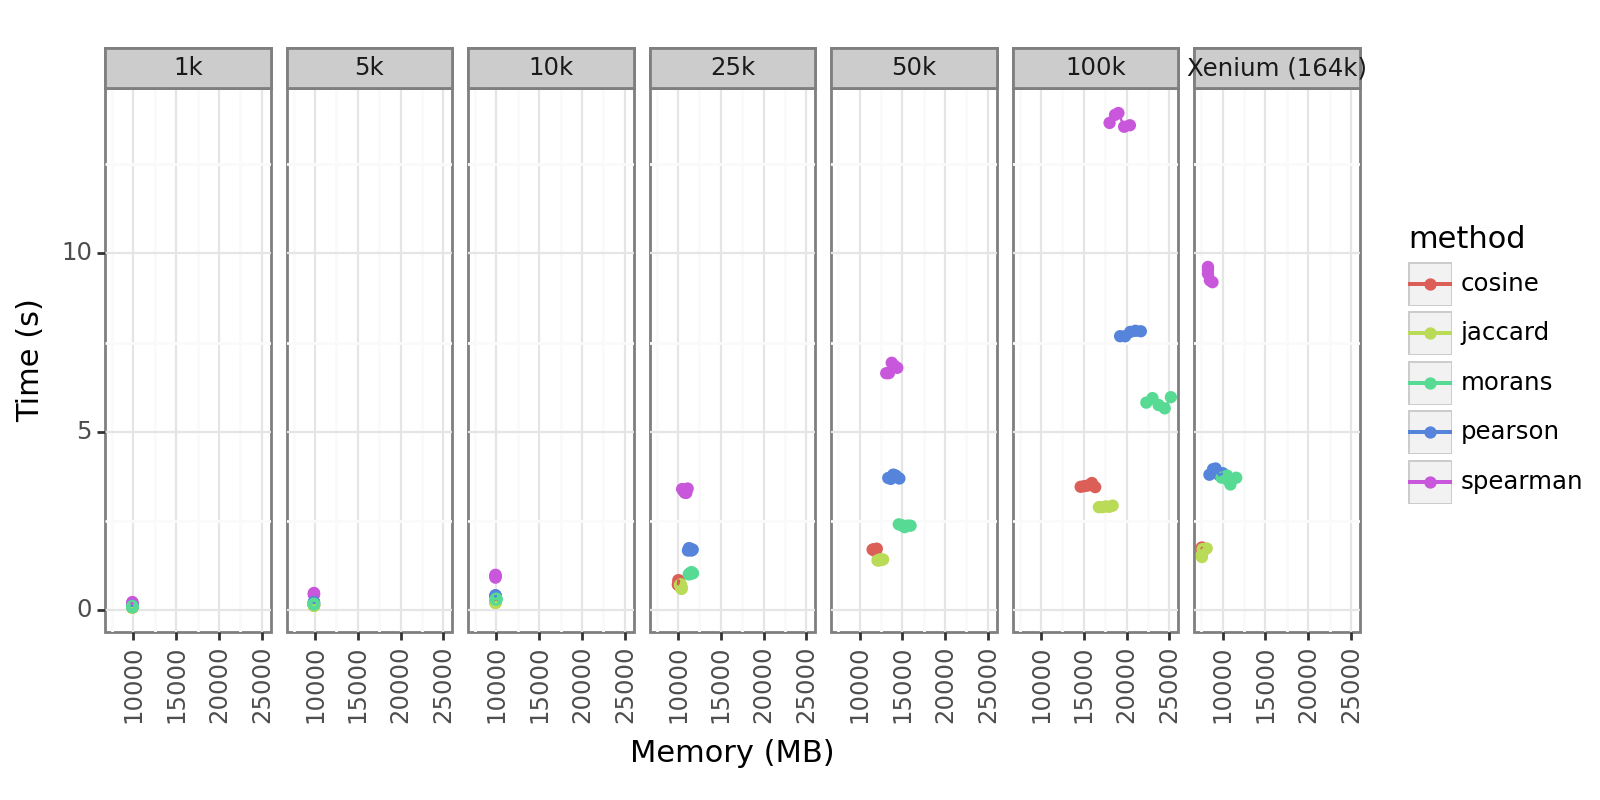

<Figure Size: (800 x 400)>

In [37]:
(
    p9.ggplot(benchmark_stats, p9.aes(x="memory", y="time", color="method")) + 
    p9.geom_point() +
    p9.geom_line() +
    p9.theme_bw() +
    p9.facet_grid("~ dataset" ) +
    p9.labs(x="Memory (MB)", y="Time (s)") +
    # rotate
    p9.theme(axis_text_x = p9.element_text(angle = 90), figure_size=(8, 4))
)

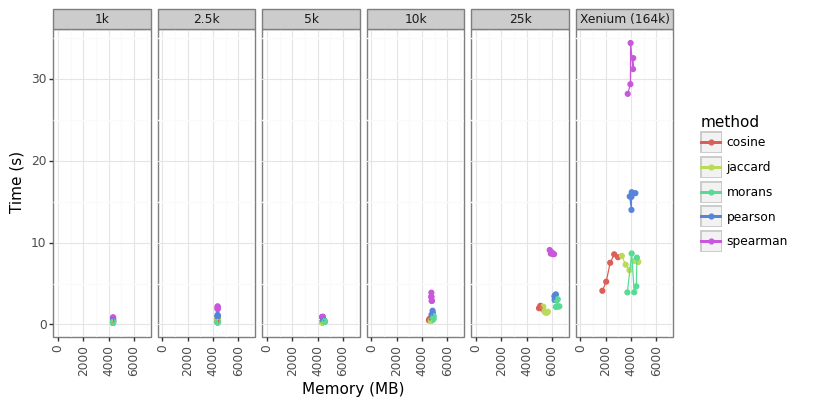

<ggplot: (8727488545207)>

In [90]:
(
    p9.ggplot(benchmark_stats, p9.aes(x="memory", y="time", color="method")) + 
    p9.geom_point() +
    p9.geom_line() +
    p9.theme_bw() +
    p9.facet_grid("~ dataset" ) +
    p9.labs(x="Memory (MB)", y="Time (s)") +
    # rotate
    p9.theme(axis_text_x = p9.element_text(angle = 90), figure_size=(8, 4)) +
    # xlim
    p9.scale_x_continuous(limits=(0, 7000))
)

Check Correlation between Spearman and Masked Spearman

In [41]:
methods = ["masked_spearman", "spearman"]

In [40]:
obs_list = [1000, 5000, 10000]

In [ ]:
for n_obs in obs_list:
    print(n_obs)
    
    for i in range(5):
        if isinstance(n_obs, int):
            adata = _sample_anndata(n_obs=n_obs, seed=i)
            resource = _sample_resource(adata, n_lrs=500)
        elif (n_obs=="xenium"):
            adata = sc.read_h5ad("xenium.h5ad")
            resource = adata.uns['resource']
            
        for method in methods:
            print(method)
            li.mt.lr_bivar(function=li.mt.lr_bivar,
                            adata=adata, 
                            function_name=method, 
                            n_perms=None,
                            use_raw=False, 
                            verbose=False,
                            mask_negatives=False,
                            resource=resource
                            )